In [2]:
# Install scikit-learn if not already installed
!pip install scikit-learn


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from google.colab import files

uploaded = files.upload()


Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [9]:
import pandas as pd

# Directly read the files (semicolon separator)
train_df = pd.read_csv('train.txt', sep=';', names=['text', 'label'])
test_df = pd.read_csv('test.txt', sep=';', names=['text', 'label'])
val_df = pd.read_csv('val.txt', sep=';', names=['text', 'label'])

# Quick check
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Val shape:", val_df.shape)
print(train_df.head())


Train shape: (16000, 2)
Test shape: (2000, 2)
Val shape: (2000, 2)
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [10]:
def preprocess_text(text):
    return text.lower().strip()

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)


In [11]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['label']
y_test = test_df['label']


In [12]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.869

Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.89      0.79      0.84       224
         joy       0.84      0.96      0.89       695
        love       0.83      0.60      0.69       159
     sadness       0.90      0.93      0.91       581
    surprise       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



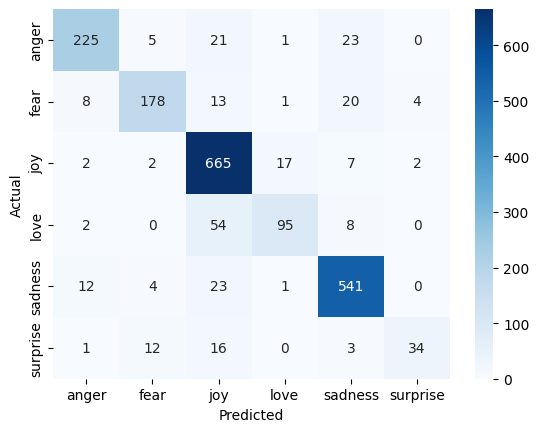

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
sample_text = ["I am so happy and excited for this project!"]
sample_text = [preprocess_text(t) for t in sample_text]
sample_features = vectorizer.transform(sample_text)
prediction = model.predict(sample_features)
print("Predicted emotion:", prediction[0])


Predicted emotion: joy
